In [1]:
import pandas as pd, numpy as np, os

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree , metrics, preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as cm

In [3]:
os.chdir('D:\ID MINE\DATA')

In [4]:
os.listdir()

['Advertising.csv',
 'bank_data.sas7bdat',
 'biology.sas7bdat',
 'chemistry.sas7bdat',
 'Churn Data.csv',
 'Churn_data.csv',
 'countries.csv',
 'Data+Dictionary-+Telecom+Churn+Case+Study.xlsx',
 'data-titanic.csv',
 'dataforclass1.zip',
 'Decision_Tree.sav',
 'df.csv',
 'df2.csv',
 'employee_detail.sas7bdat',
 'employee_payroll.csv',
 'english.sas7bdat',
 'flights.xlsx',
 'german.data.txt',
 'HMEQ.xlsx',
 'Housing (1).csv',
 'housing.csv',
 'HR Attrition.xlsx',
 'iris.csv',
 'J1.csv',
 'kannada.sas7bdat',
 'maths.sas7bdat',
 'newspain.csv',
 'Nortel.csv',
 'nortel.sas7bdat',
 'nortel.xlsx',
 'OILPROD.CSV',
 'oilrsrvs.csv',
 'payroll2.xlsx',
 'payroll_stat.xlsx',
 'physics.sas7bdat',
 'Problem Statement.docx',
 'RandomForest.dot',
 'Random_Forest.sav',
 'Salaries.csv',
 'telecom_churn_data.csv',
 'tree_limited.png',
 'wine.xlsx',
 'winequality-red.csv',
 'winequality-white.csv']

In [6]:
wine_data=pd.read_excel('wine.xlsx')

In [7]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [9]:
wine_data.shape

(6497, 13)

In [10]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [13]:
wine_data.color.value_counts()

0    4898
1    1599
Name: color, dtype: int64

In [21]:
wine_data.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [16]:
wine_data.chlorides.describe()

count    6497.000000
mean        0.056034
std         0.035034
min         0.009000
25%         0.038000
50%         0.047000
75%         0.065000
max         0.611000
Name: chlorides, dtype: float64

In [17]:
wine_data.alcohol.describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [18]:
wine_data.pH.describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

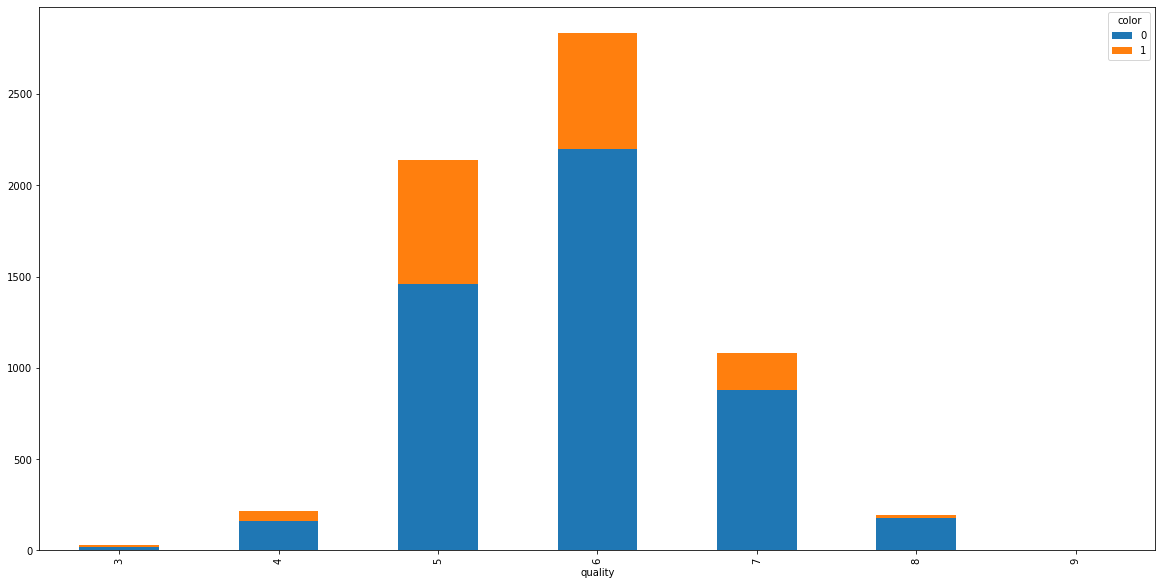

In [22]:
wine_data.groupby(["quality", "color"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))

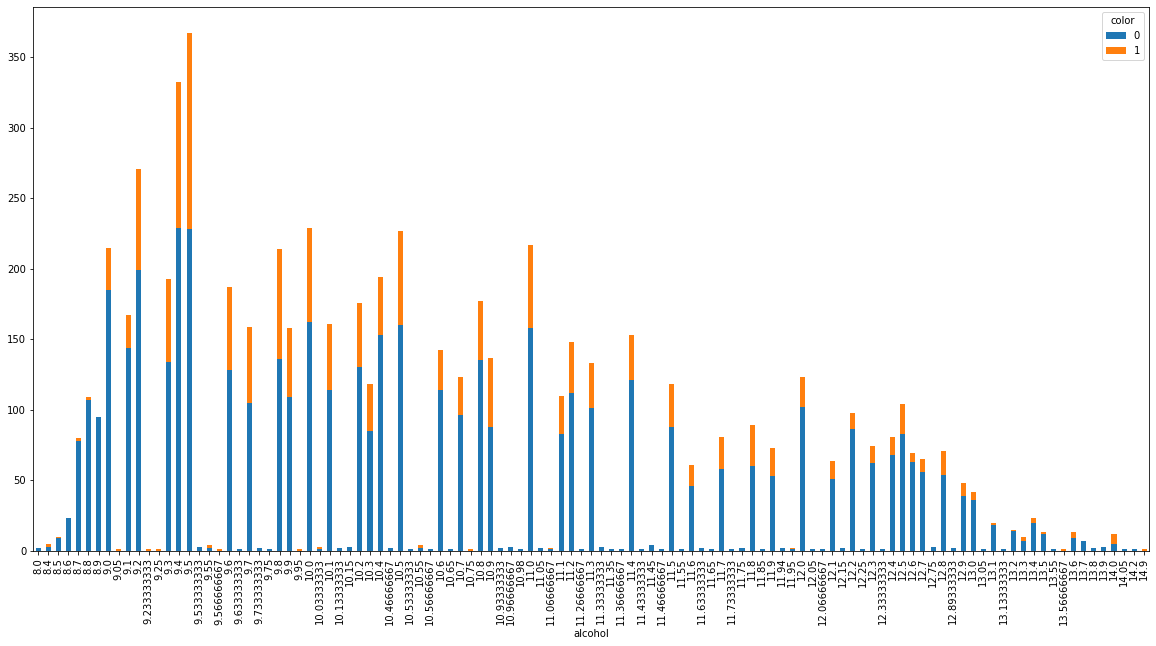

In [23]:
wine_data.groupby(["alcohol", "color"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))

In [19]:
x=wine_data.drop(['color'], axis=1, inplace=False)

In [20]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [24]:
y=wine_data.color

In [25]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: color, Length: 6497, dtype: int64

In [26]:
from sklearn.metrics import accuracy_score
from sklearn import tree , metrics, preprocessing

In [27]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=100)

In [28]:
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

C:\Users\Veena\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [29]:
logi_y_train=classifier.predict(x_train)
logi_y_test=classifier.predict(x_test)

In [30]:
logi_y_train.shape

(4547,)

In [31]:
logi_y_test.shape

(1950,)

In [32]:
final_logi_test_pred = pd.DataFrame({'Actual':y_test, 'predictions_log_y_test':logi_y_test})

In [33]:
final_logi_test_pred 

,Actual,predictions_log_y_test
5156,0,0
4935,0,0
2757,0,0
3925,0,0
2453,0,0
...,...,...
480,1,1
4038,0,0
5382,0,0
3041,0,0


In [34]:
final_logi_train_pred = pd.DataFrame({'Actual':y_train, 'predictions_log_y_train':logi_y_train})

In [35]:
final_logi_train_pred

,Actual,predictions_log_y_train
5397,0,0
5111,0,0
3519,0,0
6105,0,0
2115,0,0
...,...,...
6026,0,0
79,1,1
3927,0,0
5955,0,0


In [36]:
clf= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
clf.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=1)

In [37]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)

In [38]:
feature_importances

,importance
total sulfur dioxide,0.666169
chlorides,0.263364
volatile acidity,0.046240
sulphates,0.009948
density,0.009365
fixed acidity,0.003415
citric acid,0.000652
pH,0.000640
residual sugar,0.000207
free sulfur dioxide,0.000000


In [39]:
gbm_y_train=classifier.predict(x_train)
gbm_y_test=classifier.predict(x_test)

In [40]:
gbm_y_train.shape

(4547,)

In [41]:
gbm_y_test.shape

(1950,)

In [42]:
final_gbm_test_pred = pd.DataFrame({'Actual':y_test, 'predictions_gbm_y_test': gbm_y_test})


In [43]:
final_gbm_test_pred

,Actual,predictions_gbm_y_test
5156,0,0
4935,0,0
2757,0,0
3925,0,0
2453,0,0
...,...,...
480,1,1
4038,0,0
5382,0,0
3041,0,0


In [44]:
final_gbm_train_pred = pd.DataFrame({'Actual':y_train, 'predictions_gbm_y_train':gbm_y_train})

In [45]:
final_gbm_train_pred

,Actual,predictions_gbm_y_train
5397,0,0
5111,0,0
3519,0,0
6105,0,0
2115,0,0
...,...,...
6026,0,0
79,1,1
3927,0,0
5955,0,0


In [46]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0 )
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [47]:
feature_importances=pd.DataFrame(clf.feature_importances_, index = x_train.columns, columns=['importance']).sort_values('importance',  ascending=False)

In [48]:
feature_importances

,importance
chlorides,0.600501
total sulfur dioxide,0.295001
volatile acidity,0.046608
sulphates,0.020298
density,0.017615
citric acid,0.016661
fixed acidity,0.003315
residual sugar,0.000000
free sulfur dioxide,0.000000
pH,0.000000


In [49]:
dt_y_train=classifier.predict(x_train)
dt_y_test=classifier.predict(x_test)

In [50]:
final_dt_test_pred = pd.DataFrame({'Actual':y_test, 'predictions_dt_y_test':dt_y_test})

In [51]:
final_dt_test_pred

,Actual,predictions_dt_y_test
5156,0,0
4935,0,0
2757,0,0
3925,0,0
2453,0,0
...,...,...
480,1,1
4038,0,0
5382,0,0
3041,0,0


In [52]:
final_dt_train_pred = pd.DataFrame({'Actual':y_train, 'predictions_dty_train':dt_y_train})

In [53]:
final_dt_train_pred

,Actual,predictions_dty_train
5397,0,0
5111,0,0
3519,0,0
6105,0,0
2115,0,0
...,...,...
6026,0,0
79,1,1
3927,0,0
5955,0,0


In [54]:
dt_y_train.shape

(4547,)

In [55]:
dt_y_test.shape

(1950,)

In [56]:
X1=pd.concat([final_logi_train_pred,final_gbm_train_pred,final_dt_train_pred], axis=1)

In [57]:
X=X1.loc[:, ~X1.columns.duplicated()]

In [58]:
X.columns

Index(['Actual', 'predictions_log_y_train', 'predictions_gbm_y_train',
       'predictions_dty_train'],
      dtype='object')

In [59]:
Y1=pd.concat([final_logi_test_pred,final_gbm_test_pred,final_dt_test_pred], axis=1)

In [60]:
Y=Y1.loc[:, ~X1.columns.duplicated()]

In [61]:
Y

,Actual,predictions_log_y_test,predictions_gbm_y_test,predictions_dt_y_test
5156,0,0,0,0
4935,0,0,0,0
2757,0,0,0,0
3925,0,0,0,0
2453,0,0,0,0
...,...,...,...,...
480,1,1,1,1
4038,0,0,0,0
5382,0,0,0,0
3041,0,0,0,0


In [62]:
Y.columns

Index(['Actual', 'predictions_log_y_test', 'predictions_gbm_y_test',
       'predictions_dt_y_test'],
      dtype='object')

In [63]:
x_train=X[['predictions_log_y_train', 'predictions_gbm_y_train','predictions_dty_train']]

In [64]:
x_train.shape

(4547, 3)

In [65]:
y_train

5397    0
5111    0
3519    0
6105    0
2115    0
       ..
6026    0
79      1
3927    0
5955    0
5640    0
Name: color, Length: 4547, dtype: int64

In [66]:
x_test=Y[['predictions_log_y_test', 'predictions_gbm_y_test', 'predictions_dt_y_test']]

In [67]:
x_test.shape

(1950, 3)

In [68]:
y_train=X.Actual

In [69]:
y_test=Y.Actual

In [70]:
clf=RandomForestClassifier(n_estimators=1000, random_state=42, max_features=2)
clf.fit(x_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=1000, random_state=42)

In [71]:
y_pred = clf.predict(x_test)

In [72]:
final_model_predictions = pd.DataFrame({'Actual':y_test, 'predictions':y_pred})

In [73]:
final_model_predictions.head()

,Actual,predictions
5156,0,0
4935,0,0
2757,0,0
3925,0,0
2453,0,0


In [74]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 36
Accuracy: 0.98


In [75]:
y_pred_prob = clf.predict_proba(x_test)

In [76]:
y_pred_prob = clf.predict_proba(x_test)[:, 1]


In [77]:
final_model_predictions['Predicted_prob'] = y_pred_prob

In [82]:
cm=cm(final_model_predictions.Actual, final_model_predictions.predictions, [1,0])

C:\Users\Veena\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [83]:
cm

array([[ 461,   22],
       [  14, 1453]], dtype=int64)

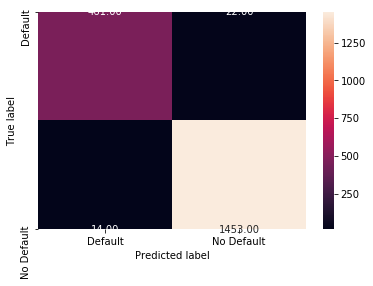

In [85]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [86]:
y_test.value_counts()

0    1467
1     483
Name: Actual, dtype: int64

In [87]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( final_model_predictions.Actual, final_model_predictions.predictions  ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( final_model_predictions.Actual, final_model_predictions.predictions  ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score(final_model_predictions.Actual, final_model_predictions.predictions  ), 2 ) )

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', round( specificity, 2 ) )

Total Accuracy :  0.98
Precision :  0.97
Recall :  0.95
Sensitivity :  0.95
Specificity :  0.99


In [88]:
auc_score = metrics.roc_auc_score( final_model_predictions.Actual, final_model_predictions.Predicted_prob  )
round( float( auc_score ), 2 )

0.97

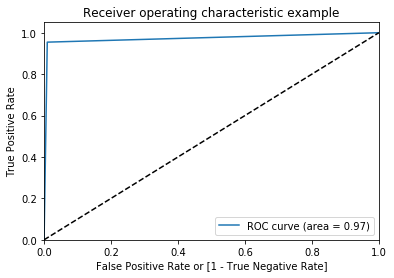

In [89]:
fpr, tpr, thresholds = metrics.roc_curve( final_model_predictions.Actual, final_model_predictions.Predicted_prob,drop_intermediate = False) 
auc_score = metrics.roc_auc_score( final_model_predictions.Actual, final_model_predictions.Predicted_prob )
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
